In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [10]:
# Fetch data and hot-encode it
def multi_hot_encode(sentences,dict_length):
    vectors = np.zeros((len(sentences),dict_length))
    for i,idxs in enumerate(sentences):
        vectors[i,idxs] = 1
    return vectors

DICT_LENGTH=10000
(trainX,trainy),(testX,testy) = keras.datasets.imdb.load_data(num_words=DICT_LENGTH)
trainX = multi_hot_encode(trainX,DICT_LENGTH)
testX = multi_hot_encode(testX,DICT_LENGTH)
print(trainX.shape,trainy.shape,testX.shape,testy.shape)


(25000, 10000) (25000,) (25000, 10000) (25000,)


In [29]:
# build model
def build_model(num_units):
    model = keras.models.Sequential([
        keras.layers.Dense(num_units, activation='relu',input_shape=(DICT_LENGTH,)),
        keras.layers.Dense(num_units, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss = 'binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])
    model.summary()
    return model


In [30]:
baseline_model = build_model(16)
baseline_history = baseline_model.fit(
            trainX,trainy,
            validation_data=(testX,testy),
            batch_size= 256,
            epochs=20)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 105us/sample - loss: 0.4015 - accuracy: 0.8421 - binary_crossentropy: 0.4015 - val_loss: 0.2899 - val_accuracy: 0.8855 - val_binary_crossentropy: 0.2899
Epoch 2/20
25000/25000 [==============================] - 2s 93us/sample - loss: 0.2079 - accuracy: 0.9226 - binar

In [17]:
smaller_model = build_model(4)
smaller_history = smaller_model.fit(
            trainX,trainy,
            validation_data=(testX,testy),
            batch_size= 256,
            epochs=20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 115us/sample - loss: 0.4639 - accuracy: 0.8189 - binary_crossentropy: 0.4639 - val_loss: 0.3378 - val_accuracy: 0.8746 - val_binary_crossentropy: 0.3378
Epoch 2/20
25000/25000 [==============================] - 3s 106us/sample - loss: 0.2548 - accuracy: 0.9123 - binary

In [18]:
bigger_model = build_model(512)
bigger_history = bigger_model.fit(
            trainX,trainy,
            validation_data=(testX,testy),
            batch_size= 256,
            epochs=20)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 10s 386us/sample - loss: 0.3318 - accuracy: 0.8556 - binary_crossentropy: 0.3318 - val_loss: 0.2940 - val_accuracy: 0.8756 - val_binary_crossentropy: 0.2940
Epoch 2/20
25000/25000 [==============================] - 9s 375us/sample - loss: 0.1365 - accuracy: 0.9504 -

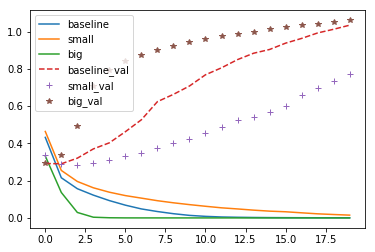

In [26]:
plt.plot(baseline_history.history['loss'],label='baseline')
plt.plot(smaller_history.history['loss'],label='small')
plt.plot(bigger_history.history['loss'],label='big')
plt.plot(baseline_history.history['val_loss'],'--',label='baseline_val')
plt.plot(smaller_history.history['val_loss'],'+',label='small_val')
plt.plot(bigger_history.history['val_loss'],'*',label='big_val')
plt.legend()
plt.show()

In [33]:
# build model
def build_l2_model(num_units):
    model = keras.models.Sequential([
        keras.layers.Dense(num_units, activation='relu',
                           kernel_regularizer = keras.regularizers.l2(0.001),
                           input_shape=(DICT_LENGTH,)),
        keras.layers.Dense(num_units, activation='relu',
                          kernel_regularizer= keras.regularizers.l2(0.001)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss = 'binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])
    model.summary()
    return model

In [36]:
l2_baseline_model = build_l2_model(16)
l2_baseline_history = l2_baseline_model.fit(
            trainX,trainy,
            validation_data=(testX,testy),
            batch_size= 256,
            epochs=20)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 102us/sample - loss: 0.4308 - accuracy: 0.8460 - binary_crossentropy: 0.3900 - val_loss: 0.3336 - val_accuracy: 0.8850 - val_binary_crossentropy: 0.2881
Epoch 2/20
25000/25000 [==============================] - 2s 91us/sample - loss: 0.2649 - accuracy: 0.9203 - binar

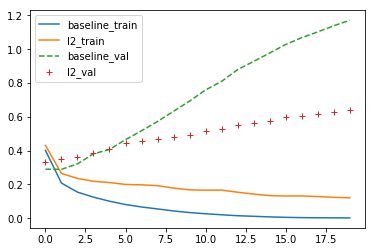

In [37]:
plt.plot(baseline_history.history['loss'],label='baseline_train')
plt.plot(l2_baseline_history.history['loss'],label='l2_train')

plt.plot(baseline_history.history['val_loss'],'--',label='baseline_val')
plt.plot(l2_baseline_history.history['val_loss'],'+',label='l2_val')
plt.legend()
plt.show()

In [38]:
# build dropout model
def build_dropout_model(num_units):
    model = keras.models.Sequential([
        keras.layers.Dense(num_units, activation='relu',input_shape=(DICT_LENGTH,)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_units, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                 loss = 'binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])
    model.summary()
    return model

In [39]:
dropout_baseline_model = build_dropout_model(16)
dropout_baseline_history = dropout_baseline_model.fit(
            trainX,trainy,
            validation_data=(testX,testy),
            batch_size= 256,
            epochs=20)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 106

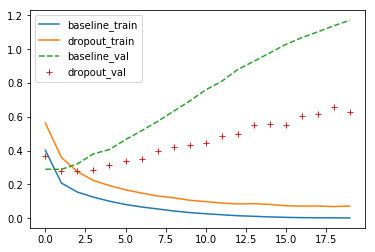

In [40]:
plt.plot(baseline_history.history['loss'],label='baseline_train')
plt.plot(dropout_baseline_history.history['loss'],label='dropout_train')

plt.plot(baseline_history.history['val_loss'],'--',label='baseline_val')
plt.plot(dropout_baseline_history.history['val_loss'],'+',label='dropout_val')
plt.legend()
plt.show()